 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [335]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline



# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [336]:
#Data File Paths

whale_returns_data = Path('./Resources/whale_returns.csv')

# Reading whale returns

whale_returns_df = pd.read_csv(whale_returns_data, parse_dates=True, infer_datetime_format=True, index_col="Date")

whale_returns_df



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [337]:
# Count nulls

whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [338]:
# Drop nulls

whale_returns_df = whale_returns_df.dropna()



## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [339]:
# Reading algorithmic returns

algo_returns_data = Path("./Resources/algo_returns.csv")

algo_returns_df = pd.read_csv(algo_returns_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

algo_returns_df


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [340]:
# Count nulls

algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [341]:
# Drop nulls

algo_returns_df = algo_returns_df.dropna()

algo_returns_df


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [342]:
# Reading S&P 500 Closing Prices

sp500_history_data = Path('./Resources/sp500_history.csv')

sp500_history_df = pd.read_csv(sp500_history_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_history_df


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [343]:
# Check Data Types

sp500_history_df.dtypes

Close    object
dtype: object

In [344]:
# Fix Data Types

sp500_history_df.dtypes
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')

sp500_history_df.head()

sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

sp500_history_df.sort_index(inplace=True, ascending=True)

sp500_history_df.head()

/var/folders/07/b5twmh4j14v_gfn2zz3nsqfr0000gn/T/ipykernel_24019/581015307.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [345]:
#New Data Types

sp500_history_df.dtypes

Close    float64
dtype: object

In [346]:
# Calculate Daily Returns

sp500_daily_returns_df = sp500_history_df.pct_change()

sp500_daily_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [347]:
# Drop nulls

sp500_daily_returns_df.isnull().sum()
sp500_daily_returns_df = sp500_daily_returns_df.dropna()

sp500_daily_returns_df.isnull().sum()


Close    0
dtype: int64

In [348]:
# Rename `Close` Column to be specific to this portfolio.

sp500_daily_returns_df = sp500_daily_returns_df.rename(columns =  {"Close" : "Sp500_Daily_Returns"})

sp500_daily_returns_df


,Sp500_Daily_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [349]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.join=inner

combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns_df], axis = 'columns' , join = 'inner')

combined_returns_df.head()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

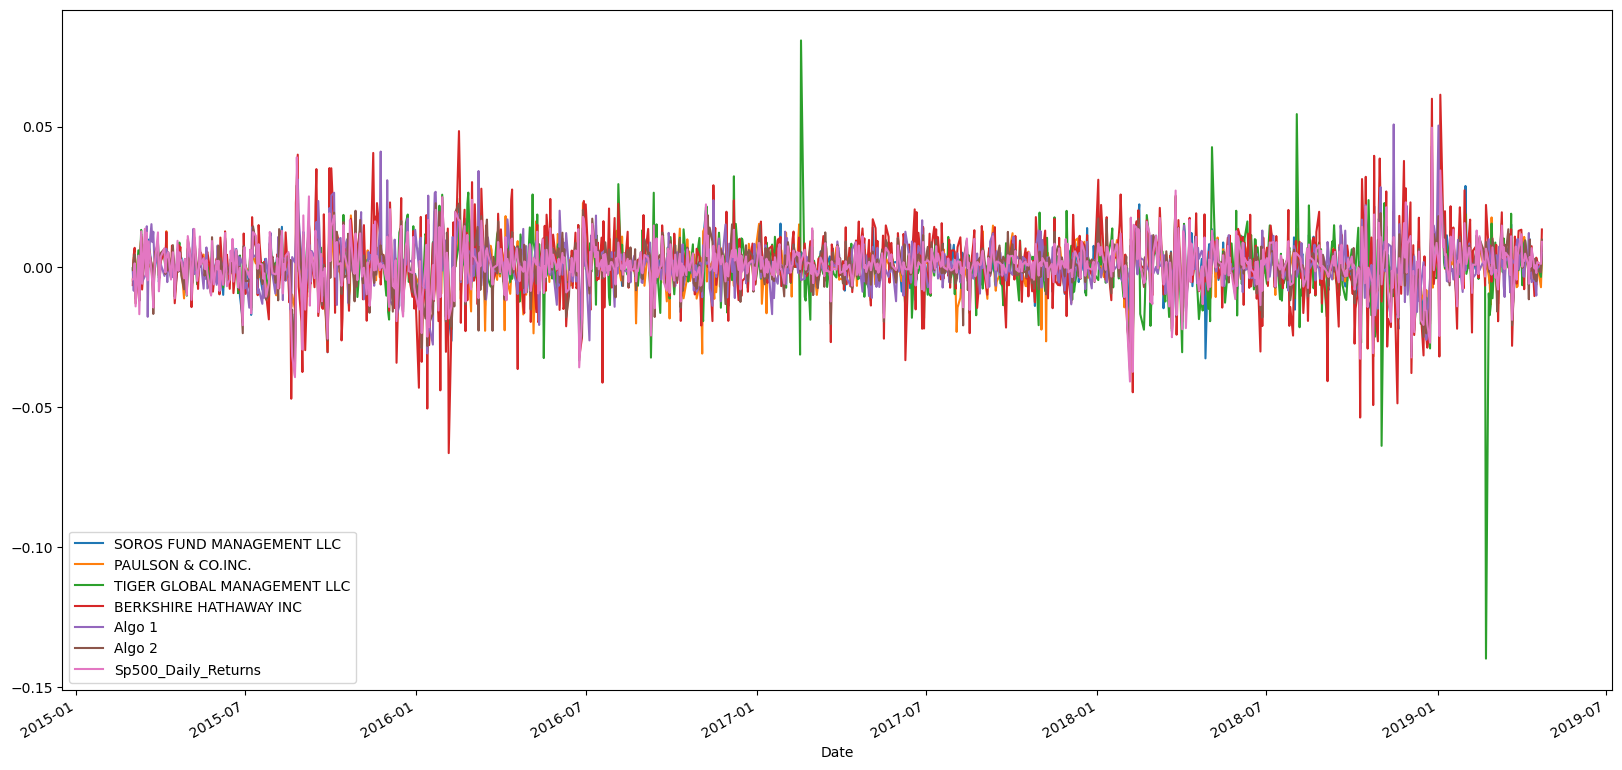

In [350]:
# Plot daily returns of all portfolios

combined_returns_df.plot(figsize=(20 , 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

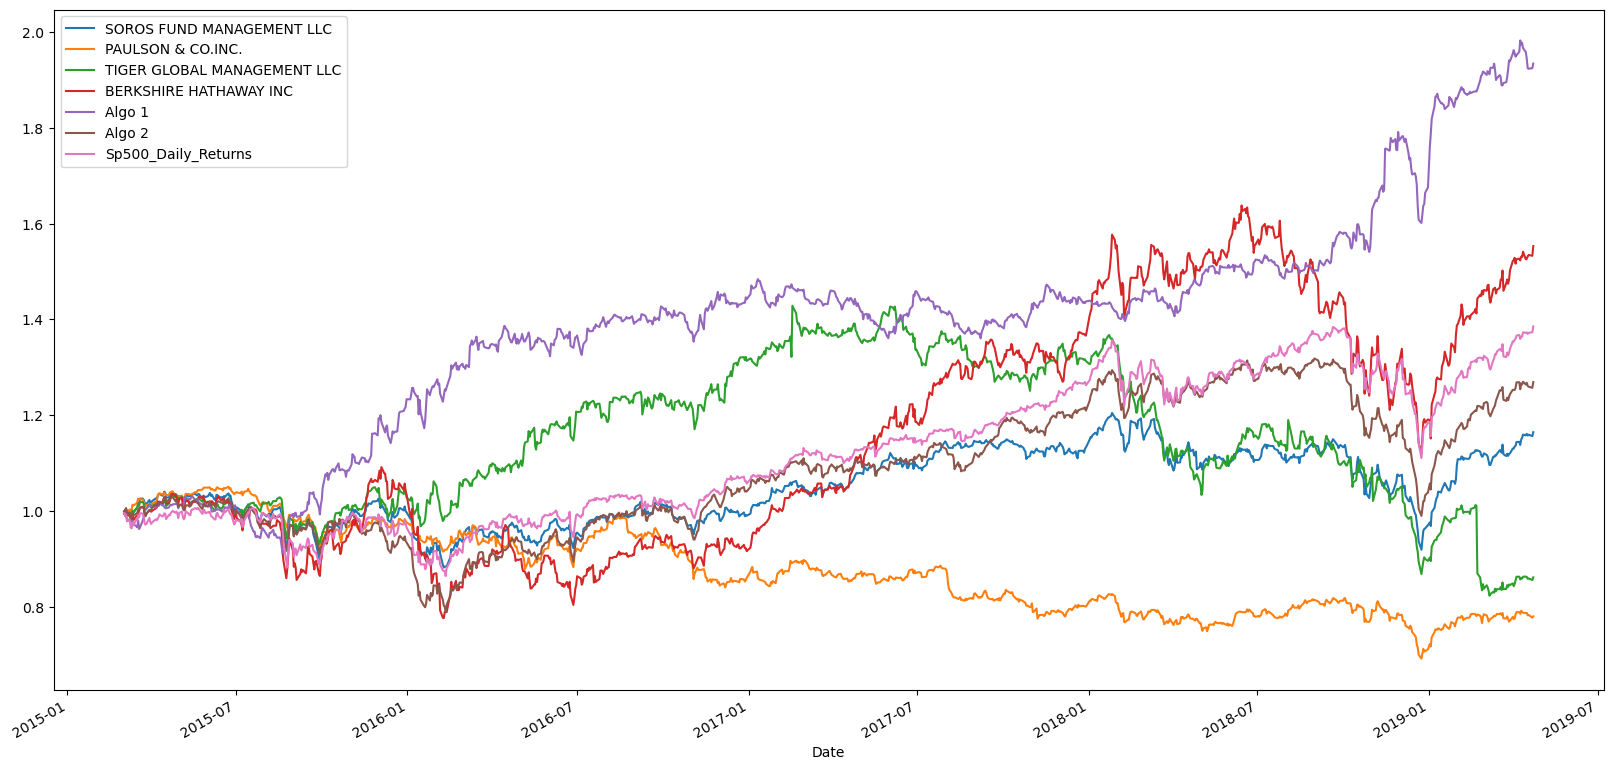

In [351]:
# Calculate cumulative returns of all portfolios

combined_cum_returns = (1 + combined_returns_df).cumprod()

# Plot cumulative returns

combined_cum_returns.plot(figsize=(20 , 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

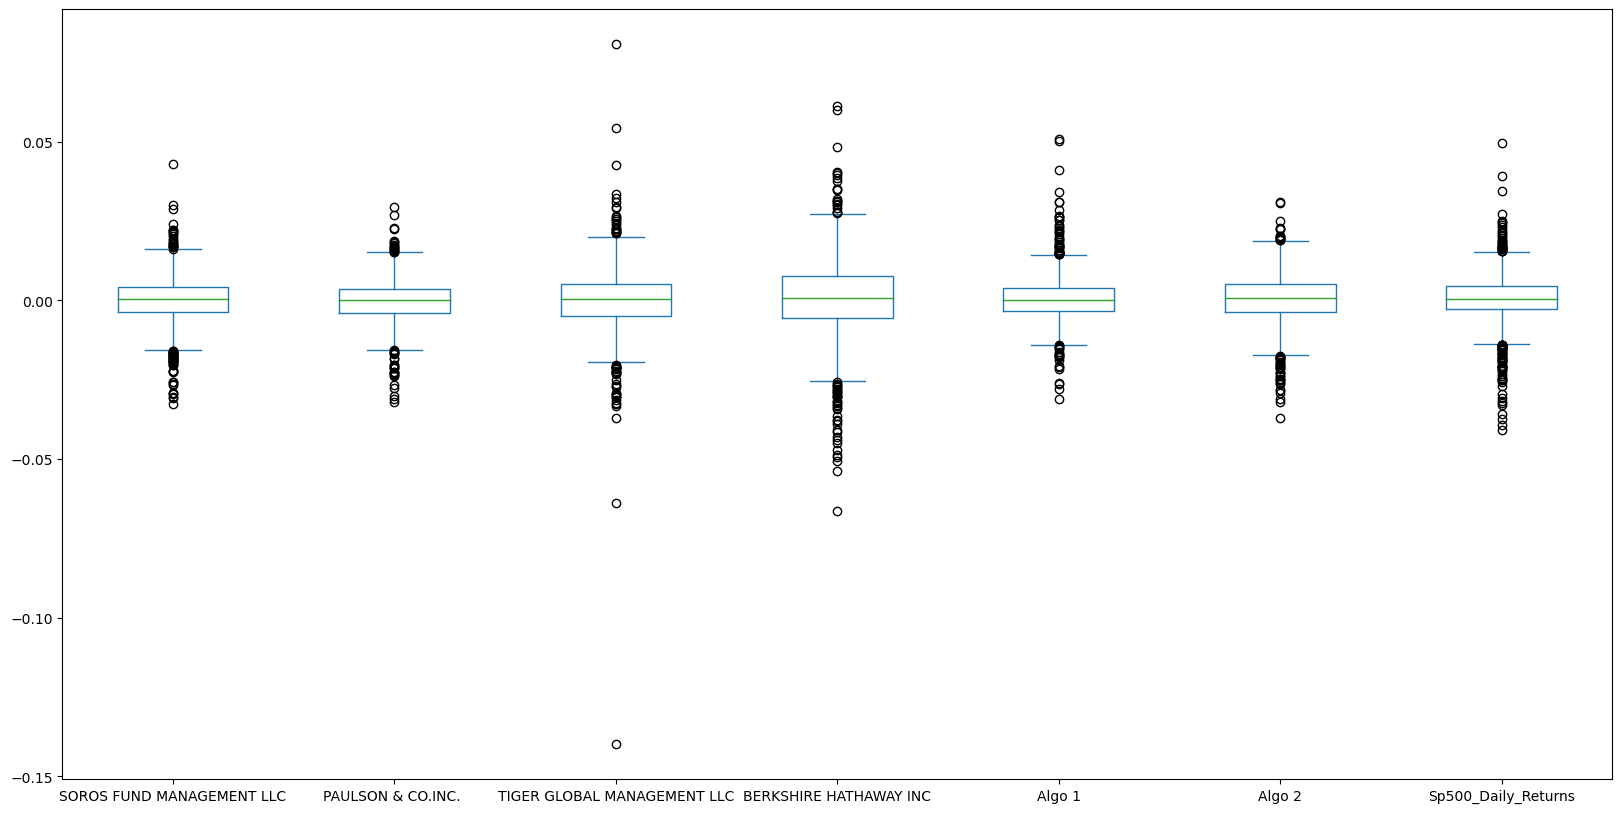

In [352]:
# Box plot to visually show risk

combined_returns_df.plot.box(figsize = (20 , 10))

### Calculate Standard Deviations

In [353]:
# Calculate the daily standard deviations of all portfolios

combined_returns_std  = combined_returns_df.std()

combined_returns_std.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [354]:
# Calculate  the daily standard deviation of S&P 500

sp500_daily_std = combined_returns_std[-1]

sp500_daily_std

# Determine which portfolios are riskier than the S&P 500

sp500_daily_std < combined_returns_std





SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
Sp500_Daily_Returns            False
dtype: bool

### Calculate the Annualized Standard Deviation

In [355]:
# Calculate the annualized standard deviation (252 trading days)

combined_annual_std = combined_returns_std * np.sqrt(252)

combined_annual_std


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
Sp500_Daily_Returns            0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

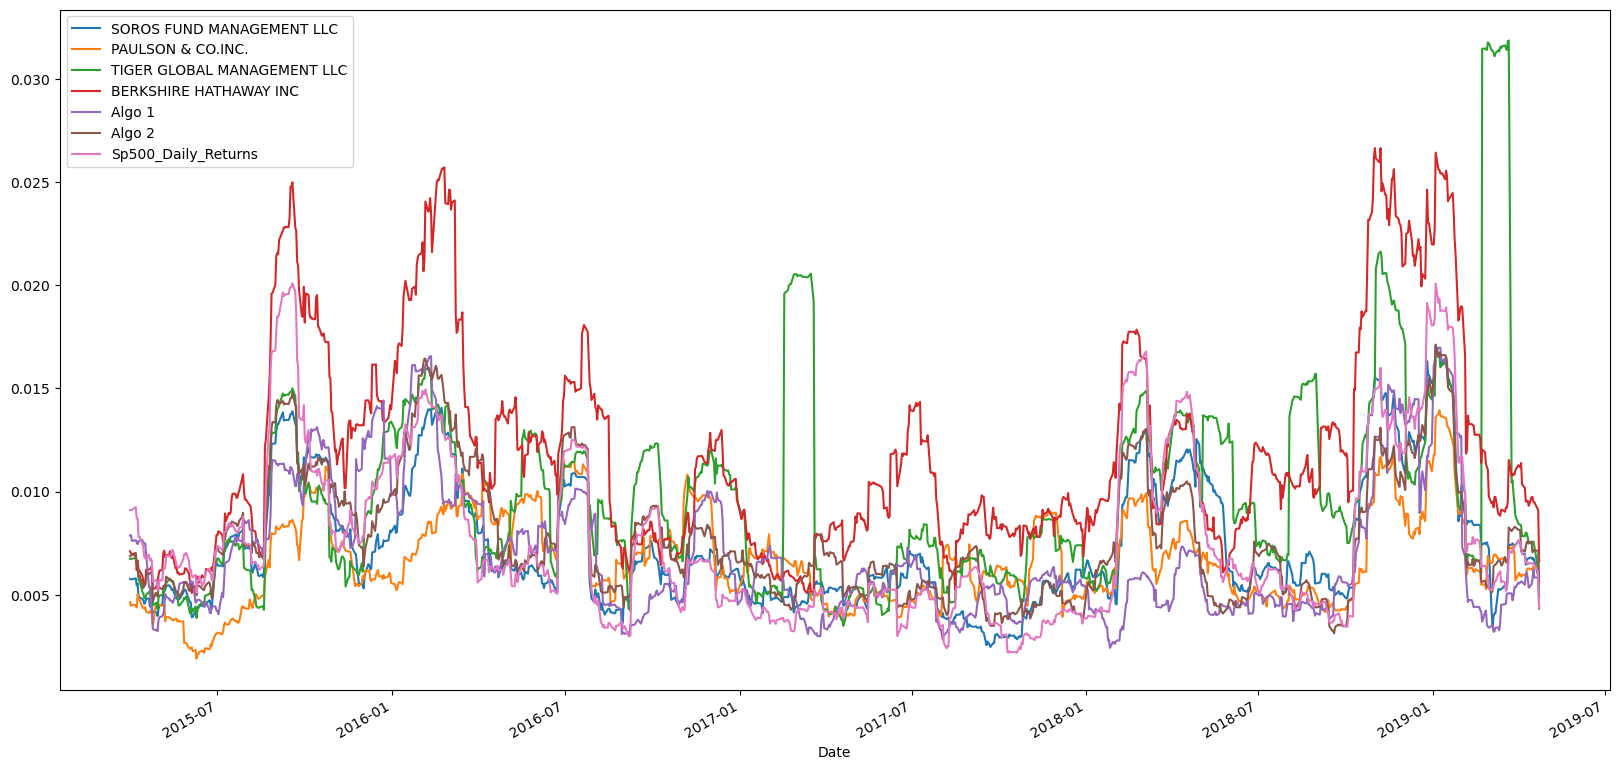

In [356]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_roll_std = combined_returns_df.rolling(window = 21).std()

combined_roll_std

# Plot the rolling standard deviation

combined_roll_std.plot(figsize=(20 , 10))


### Calculate and plot the correlation

In [357]:
# Calculate the correlation

combined_correlation = combined_returns_df.corr()

combined_correlation

# Display de correlation matrix

combined_correlation.style.background_gradient(cmap= 'ocean')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Daily_Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
Sp500_Daily_Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

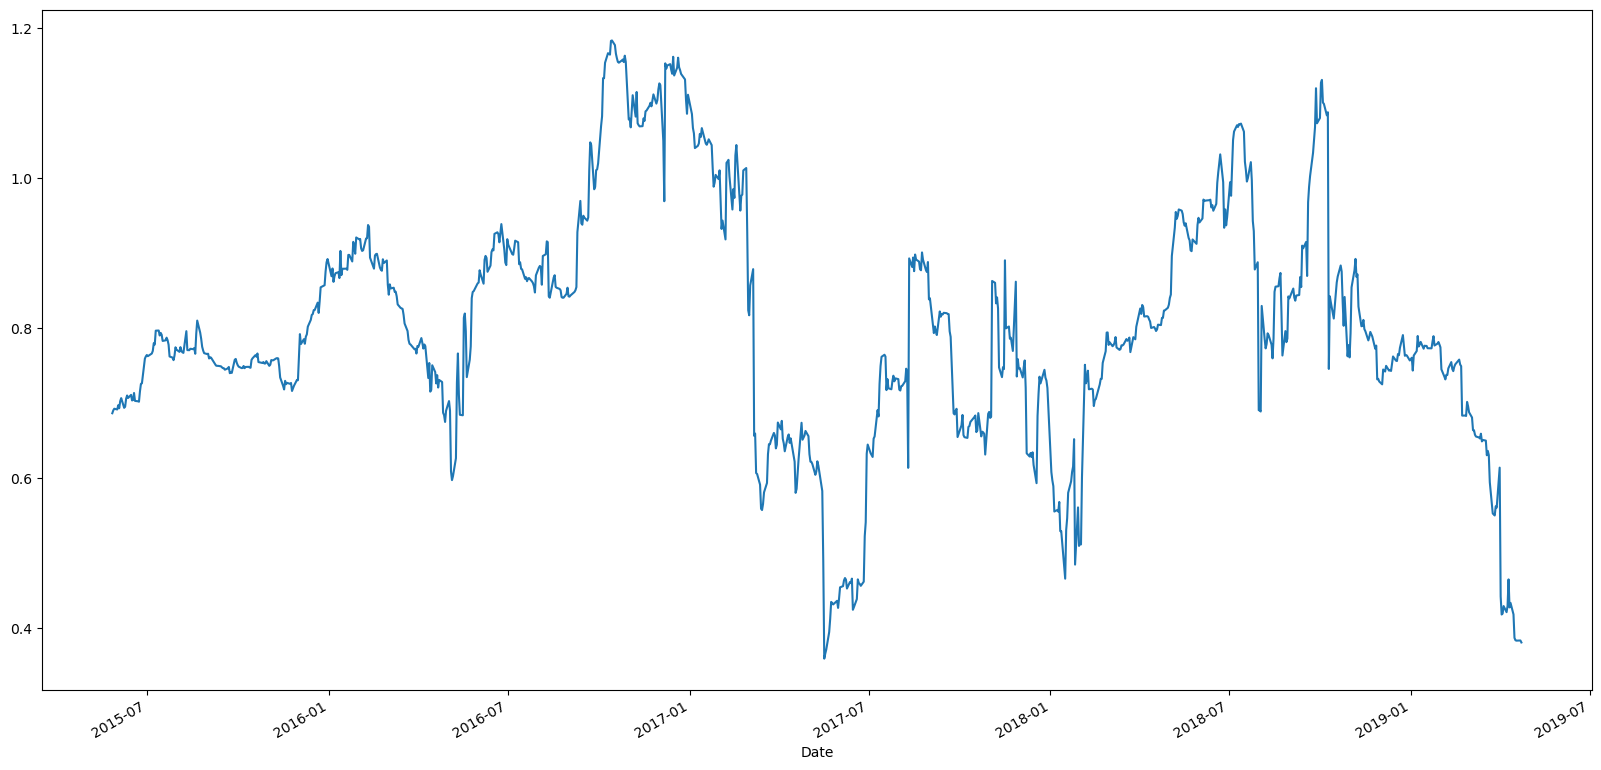

In [358]:
# Calculate covariance of a single portfolio

tiger_covariance = combined_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_returns_df['Sp500_Daily_Returns'])

tiger_covariance

# Calculate variance of S&P 500

sp500_rolling_var = combined_returns_df['Sp500_Daily_Returns'].rolling(window=60).var()

# Computing beta

tiger_rolling_beta = tiger_covariance / sp500_rolling_var

# Plot beta trend

tiger_rolling_beta.plot(figsize= (20 , 10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

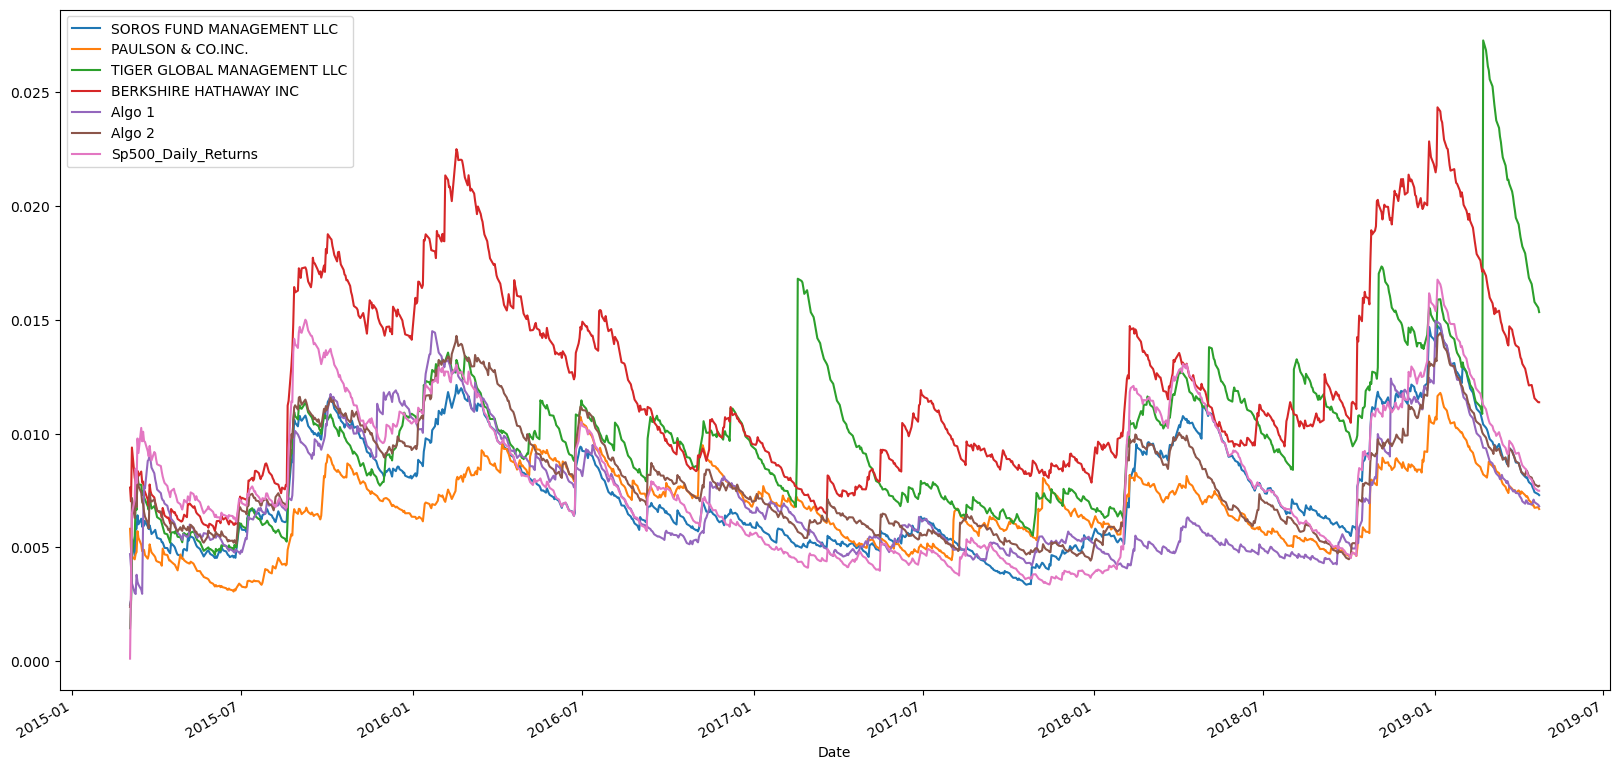

In [359]:
# Use `ewm` to calculate the rolling window df.ewm(21).std().plot

combined_ewm = combined_returns_df.ewm(halflife= 21).std()

combined_ewm.plot(figsize= (20, 10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [360]:
# Annualized Sharpe Ratios

combined_sharpe = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))

combined_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Sp500_Daily_Returns            0.648267
dtype: float64

<AxesSubplot:>

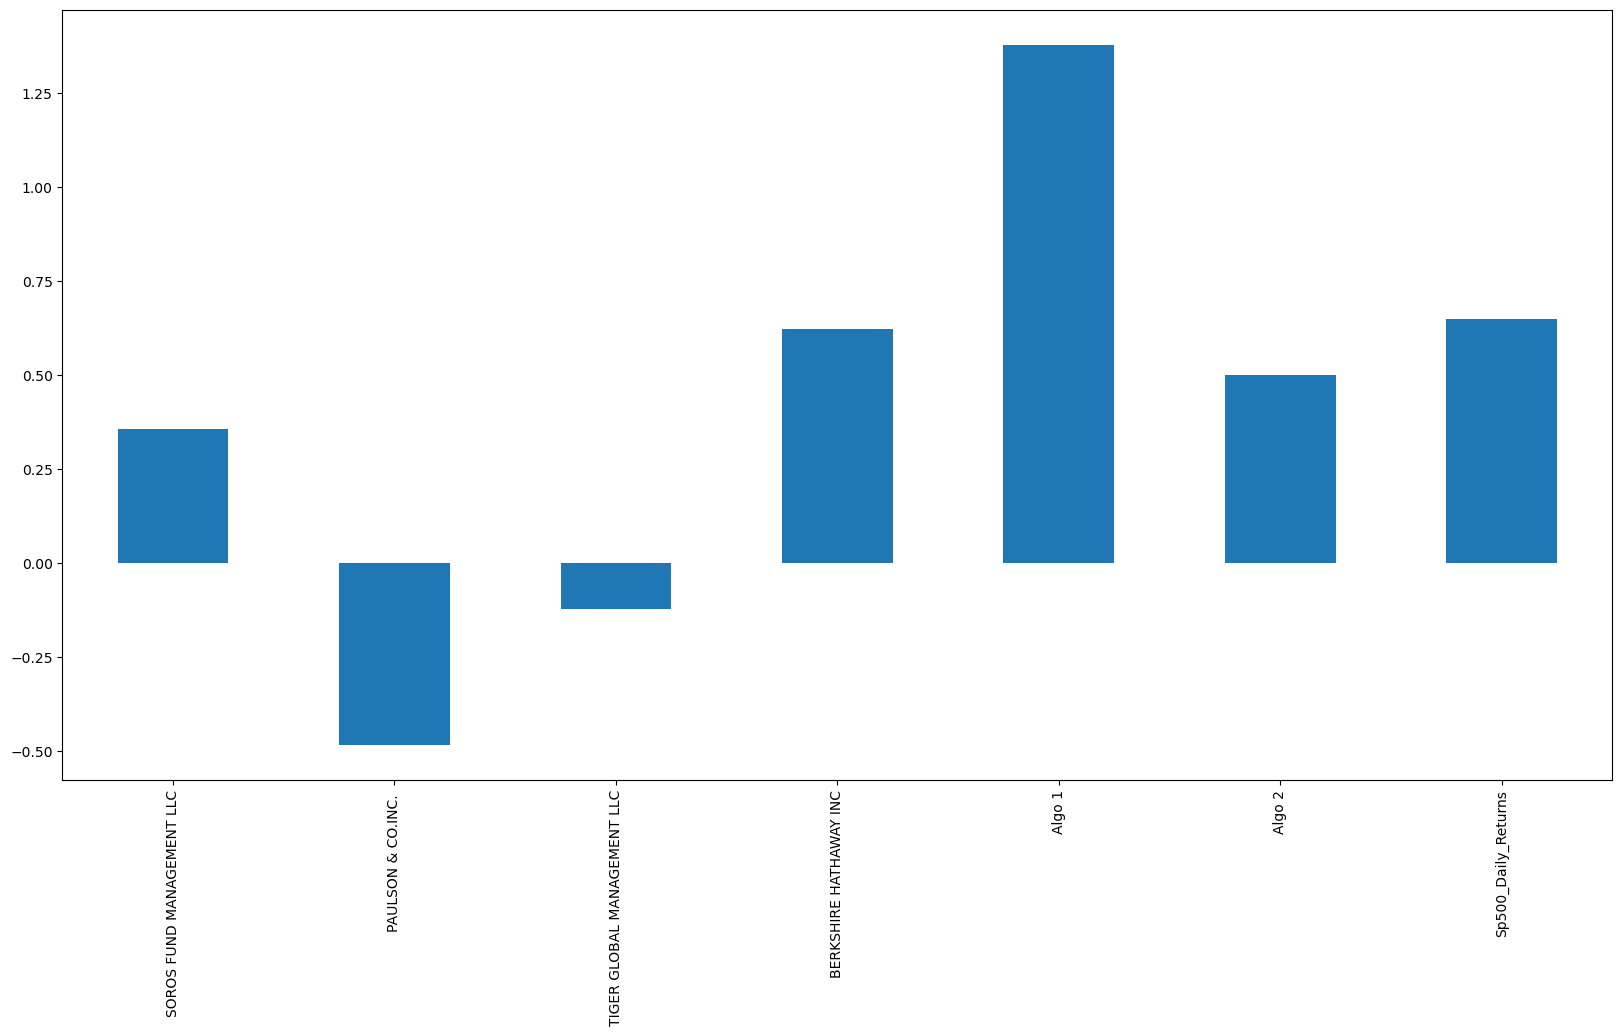

In [361]:
# Visualize the sharpe ratios as a bar plot

combined_sharpe.plot.bar(figsize = (20 , 10))


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [362]:
# The only algorithm that outperformed the Whales and the SP500 was Algo 1. Algo 2 did better than Soros, Paulson, and Tiger, but not better than Berkshire and the SP500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [384]:
# Reading data from 1st stock
aapl_data = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


In [385]:
# Reading data from 2nd stock
cost_data = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


In [386]:
# Reading data from 3rd stock
goog_data = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


In [387]:
# Combine all stocks in a single DataFrame

custom_portfolio = pd.concat([aapl_df, cost_df, goog_df], axis=0, join='inner')
custom_portfolio


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [388]:
# Reset Date index

custom_portfolio = custom_portfolio.reset_index()
custom_portfolio


,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75
...,...,...,...
745,2018-05-17,GOOG,1078.59
746,2018-05-16,GOOG,1081.77
747,2018-05-15,GOOG,1079.23
748,2018-05-14,GOOG,1100.20


In [390]:
# Reorganize portfolio data by having a column per symbol

portfolio = custom_portfolio.pivot_table(values='NOCP',index='Trade DATE', columns='Symbol')

portfolio



Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [391]:
# Calculate daily returns

portfolio_returns = portfolio.pct_change()

# Drop NAs

portfolio_returns.isnull().sum()
portfolio_returns.dropna(inplace=True)

# Display sample data

portfolio_returns.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [392]:
# Set weights

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_weighted_returns = portfolio_returns.dot(weights)

# Display sample data

portfolio_weighted_returns.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [393]:
# Join your returns DataFrame to the original returns DataFrame

combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns_df, portfolio_weighted_returns], axis='columns', join='inner')
combined_returns_df =combined_returns_df.rename(columns={0:'Portfolio Returns'})
combined_returns_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Daily_Returns,Portfolio Returns
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [394]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_returns_df = combined_returns_df.dropna()
combined_returns_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Daily_Returns,Portfolio Returns
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [395]:
# Calculate the annualized `std`
combined_returns_std = combined_returns_df.std()
combined_annualized_std = combined_returns_std*np.sqrt(252)
combined_annualized_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
Sp500_Daily_Returns            0.152054
Portfolio Returns              0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

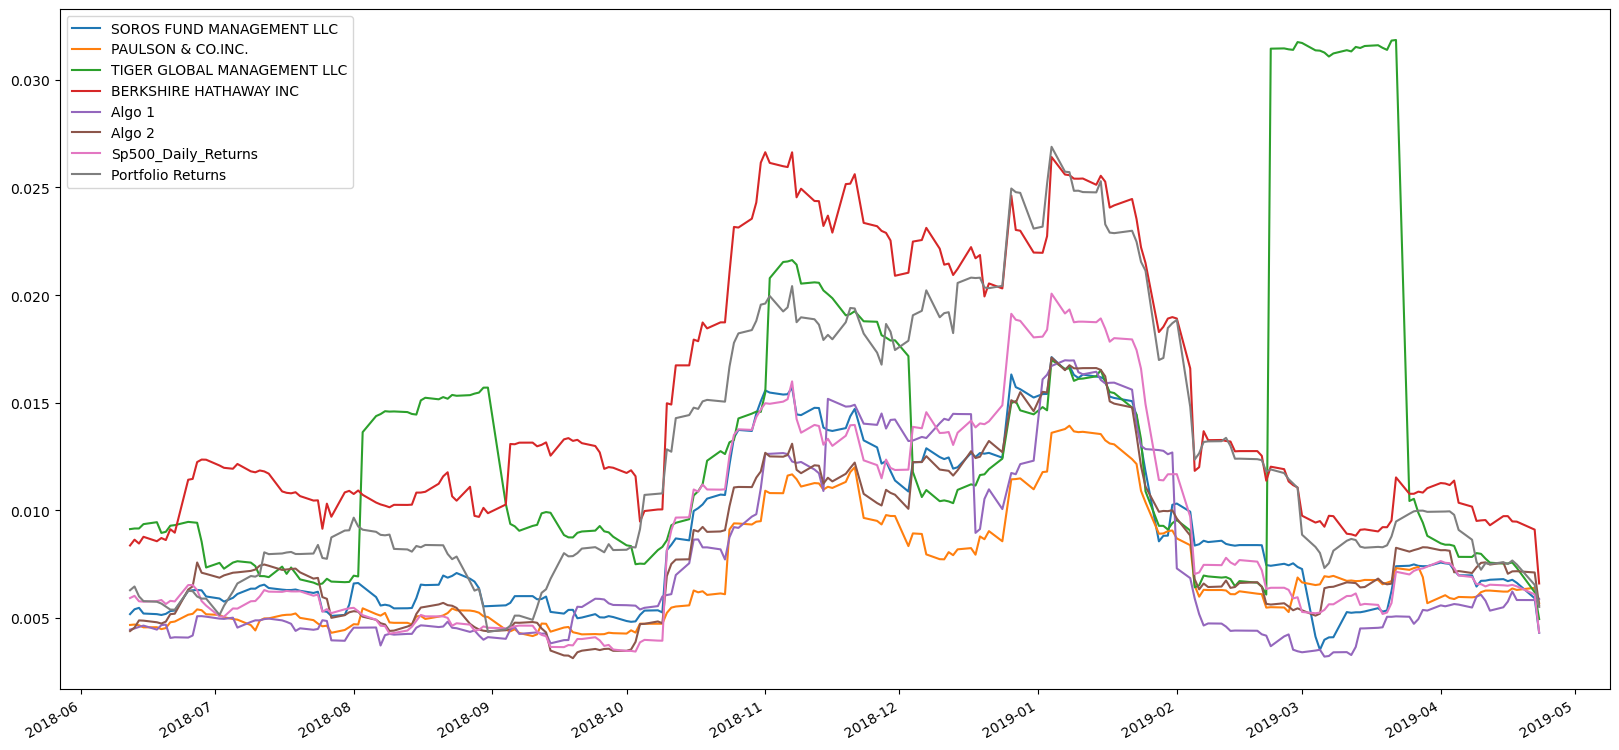

In [396]:
# Calculate rolling standard deviation

combined_rolling_std = combined_returns_df.rolling(window=21).std()

# Plot rolling standard deviation

combined_rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [398]:
# Calculate and plot the correlation

combined_returns_correlation = combined_returns_df.corr()

# Display the correlation matrix

combined_returns_correlation.style.background_gradient(cmap='ocean')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Daily_Returns,Portfolio Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
Sp500_Daily_Returns,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Portfolio Returns,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

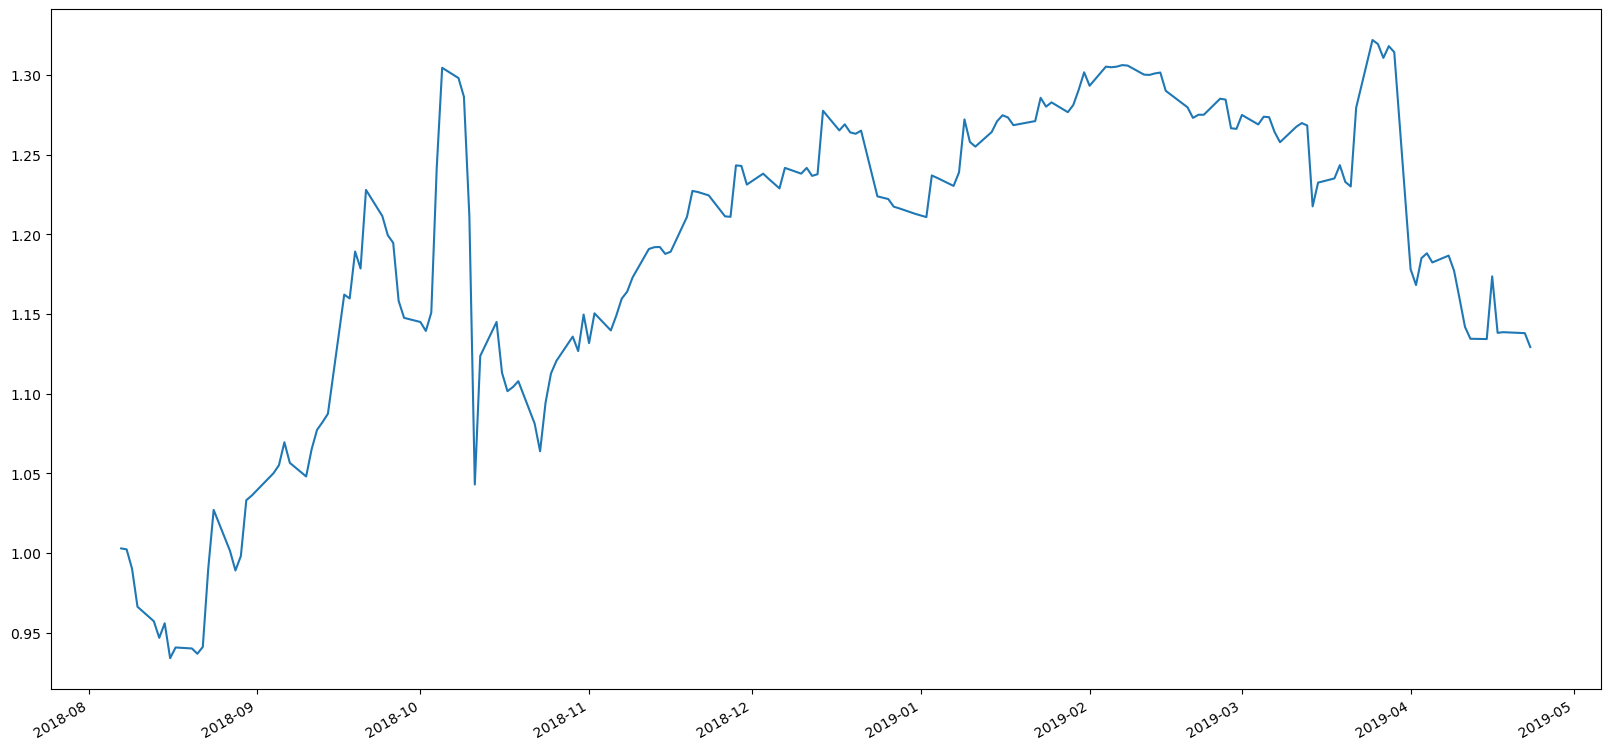

In [400]:
# Calculate and plot Beta

portfolio_covariance = combined_returns_df['Portfolio Returns'].rolling(window=60).cov(combined_returns_df['Sp500_Daily_Returns'])

# Calculate variance of S&P 500

sp500_rolling_var = combined_returns_df['Sp500_Daily_Returns'].rolling(window=60).var()

# Computing beta

portfolio_rolling_beta = portfolio_covariance/sp500_rolling_var

# Plot beta trend

portfolio_rolling_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [401]:
# Calculate Annualized Sharpe Ratios

combined_sharpe = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))

combined_sharpe


SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
Sp500_Daily_Returns            0.584820
Portfolio Returns              0.933123
dtype: float64

<AxesSubplot:>

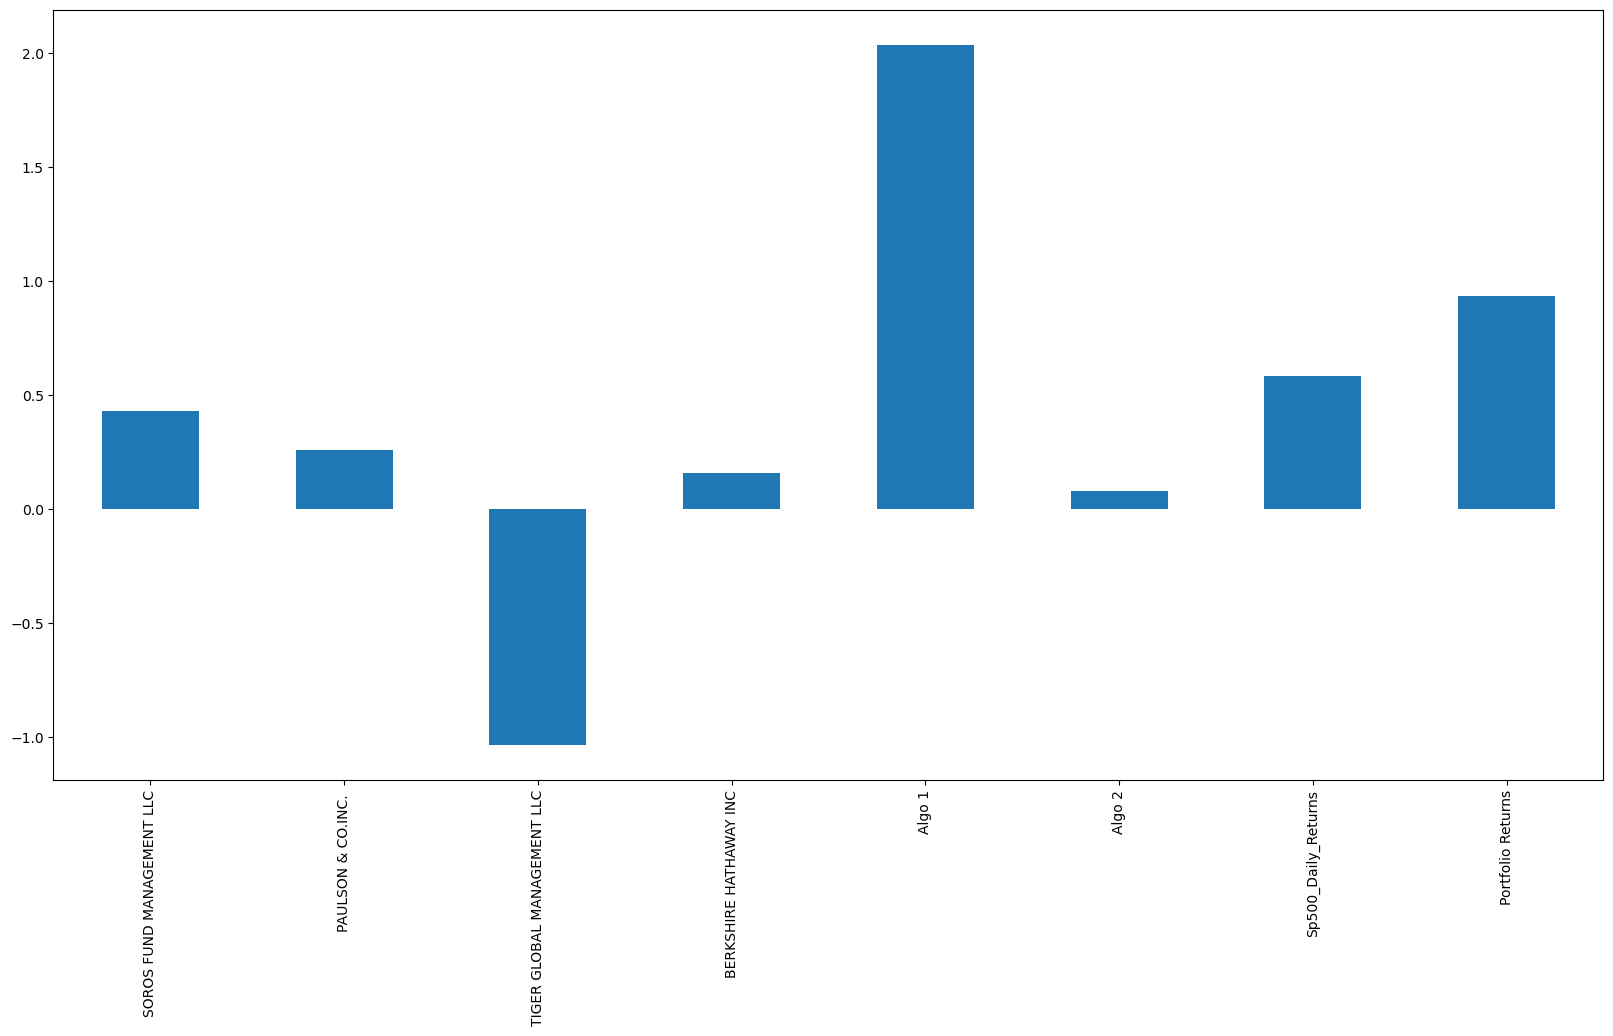

In [402]:
# Visualize the sharpe ratios as a bar plot

combined_sharpe.plot.bar(figsize=(20,10))

<AxesSubplot:>

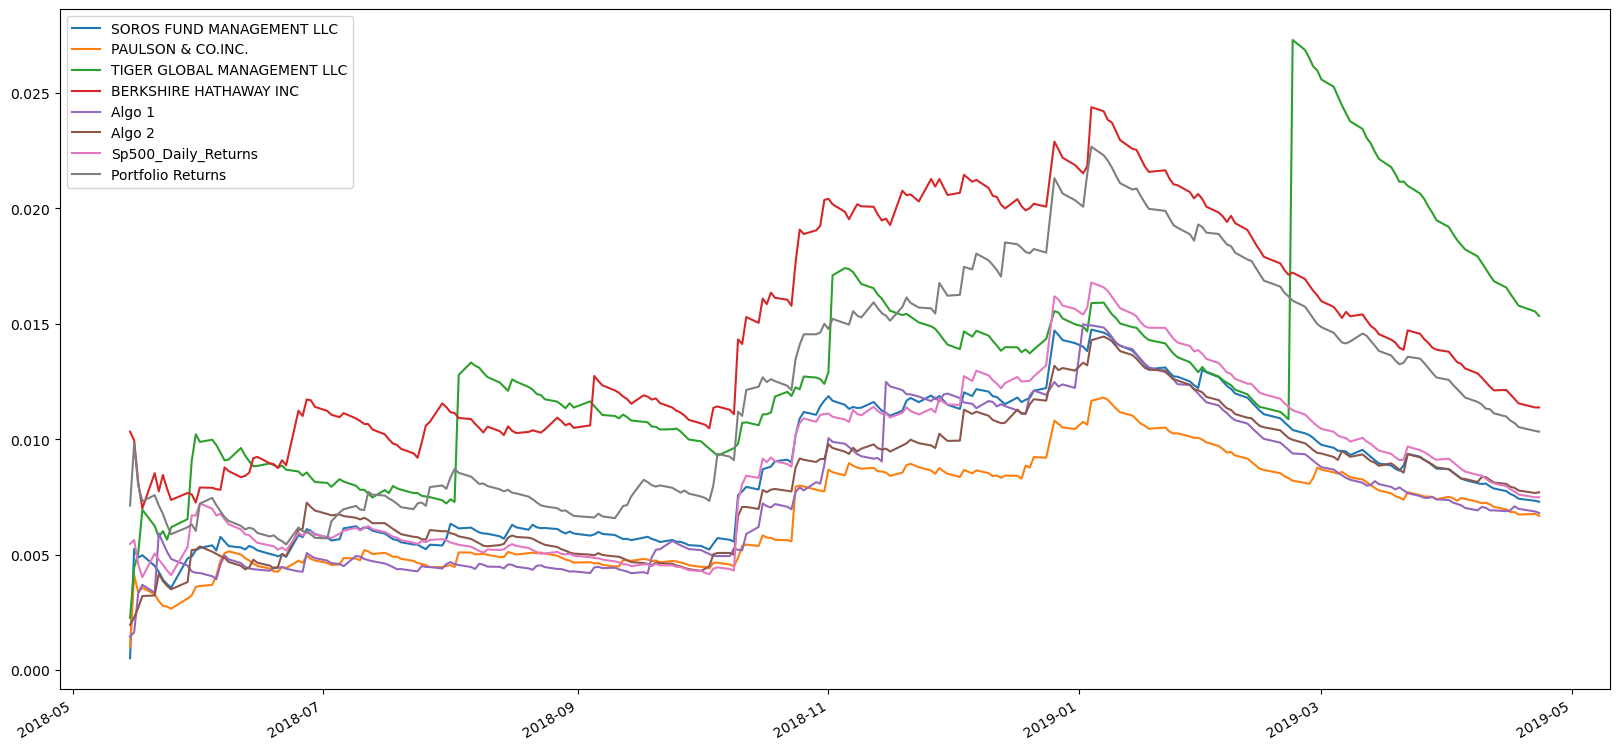

In [403]:
#Calculated the EWM for the new combined returns with the custom portfolio to see how it performed against others

combined_ewm = combined_returns_df.ewm(halflife=21).std()

combined_ewm.plot(figsize=(20,10))

<AxesSubplot:>

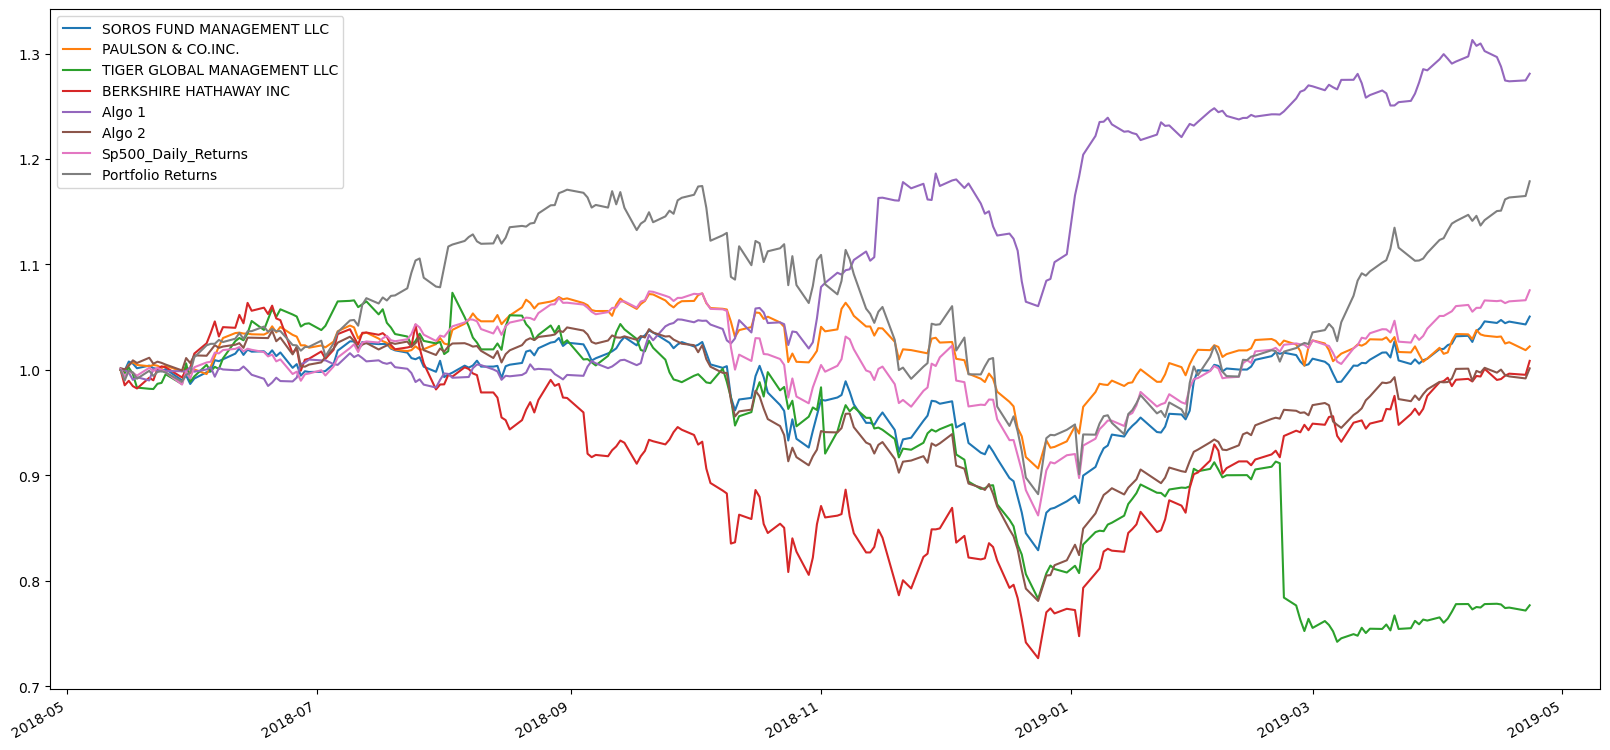

In [404]:
#Calculate the cumulative returns for custom portfolio to measure agaisnt everything else

combined_cumulative_returns_2 = (1 + combined_returns_df).cumprod()

combined_cumulative_returns_2.plot(figsize=(20,10))

<AxesSubplot:>

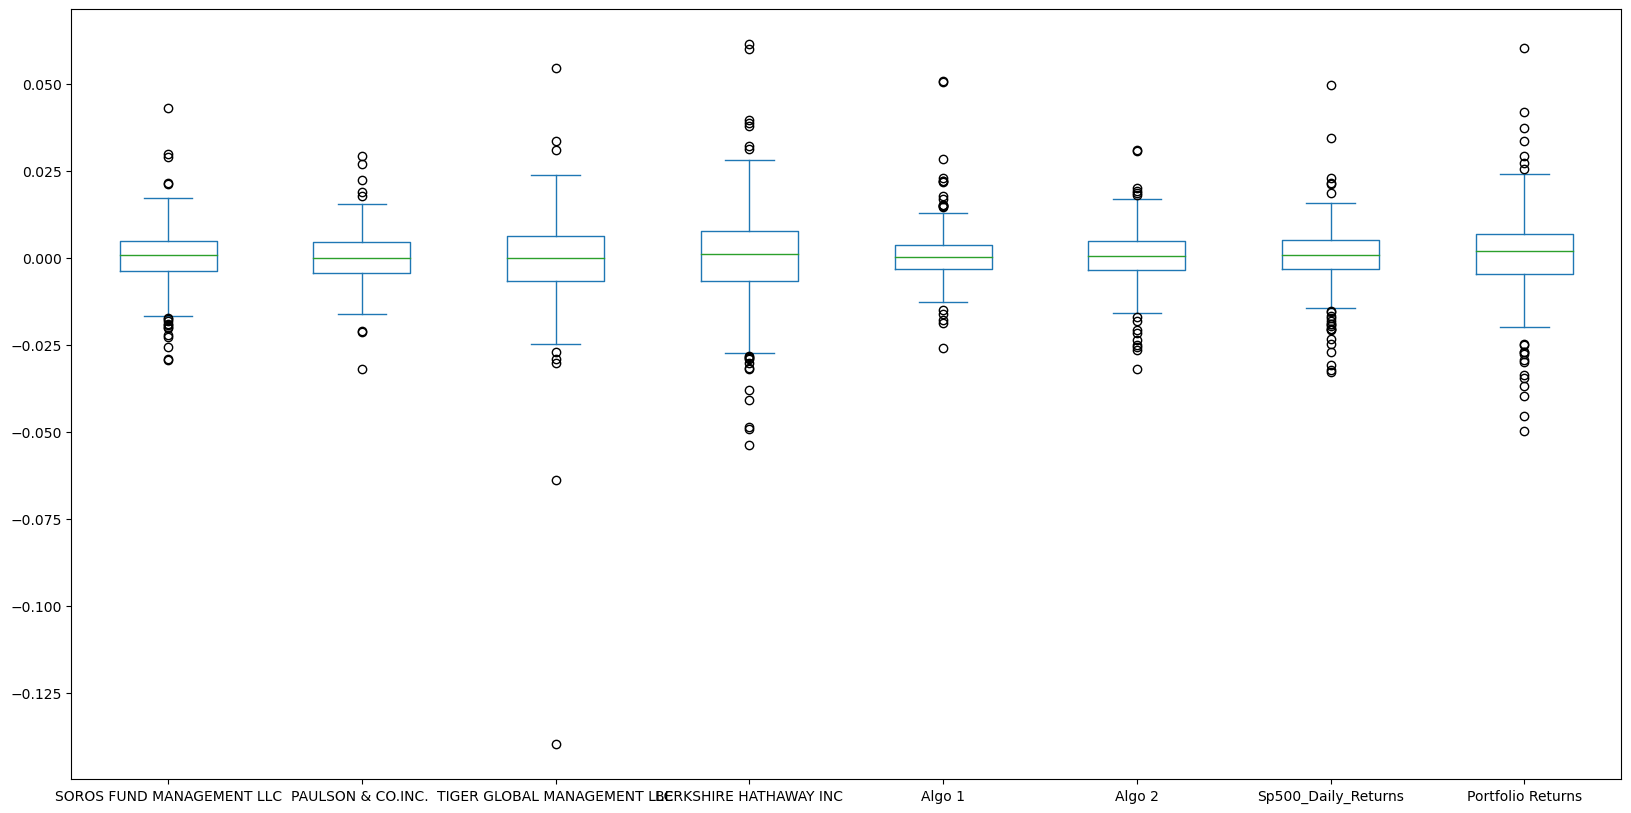

In [405]:
combined_returns_df.plot.box(figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [406]:
# I think that my custom portfolio did pretty well considering that in the Sharpe Ratio, it outperformed every one but Algo 1, so it would be a great indicator of high returns (2nd to the algo 1). 
# For the EWH, my portfolio came in 3rd place and the cumulative came in 2nd as well, so overall pretty happy with my portfolio.